**Student Id**: 19027376

**Name**: Hussain Mustafa Laghari



**Task 1: Data pre-processing and data exploration** 

- **a . Use Pandas to load the data and report the number of data points (rows) in the dataset.**


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [40]:
dt = pd.read_csv("winequality-white.csv",";")
dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
print(dt.shape)

(4898, 12)


- **b. Consider “quality” as class labels. Report the number of features in the dataset and the
number of data points in each class.**


In [50]:
# b
print(dt.quality.value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


- **c. Perform random permutations of the data using the function, shuffle, from sklearn.utils.**


In [27]:
# C 
from sklearn.utils import shuffle as s 

# white_wine = dt.drop('quality', axis = 1)
white_wine = s(dt, random_state=1)
quality = white_wine['quality']


- **d. Produce one scatter plot, that is, one feature against another feature. You are free to
choose which two features you want to use.**

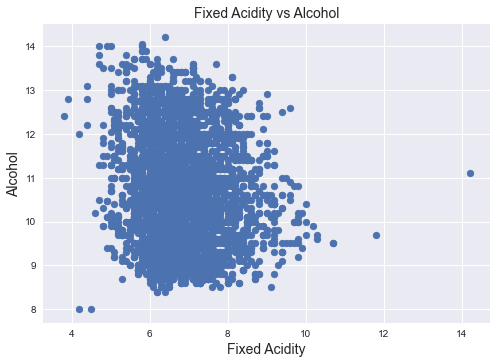

In [51]:
# d 
plt.scatter(white_wine['fixed acidity'], white_wine['alcohol'])
plt.title('Fixed Acidity vs Alcohol', fontsize = 14)
plt.xlabel('Fixed Acidity',fontsize = 14)
plt.ylabel('Alcohol',fontsize = 14)

plt.show();

**Task 2 : PCA Analysis on the white-wine dataset Using Scikit-Learn**
- **a. Perform a PCA analysis on the whole white_wine dataset.**

In [8]:
# a 

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)

pca.fit(white_wine)


PCA(n_components=2, random_state=1)

In [28]:
pca_df =  pd.DataFrame(pca.transform(white_wine), columns=['PCA_0', 'PCA_1'])

a =  pd.merge(pca_df, quality, left_index=True, right_index=True)

- **b. Plot the data in the PC1 and PC2 projections and label/colour the data in the plot
according to their class labels. Details on how to use matplotlib.pyplot.scatter can be
viewed from the following link**

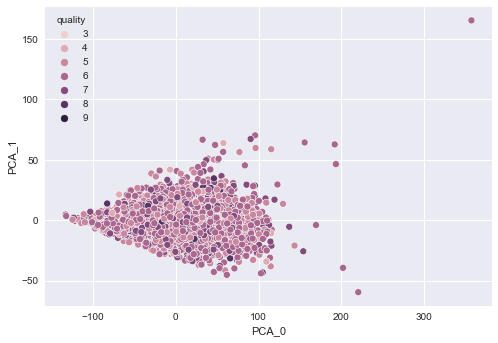

In [31]:
#b used sympy instead of matplotlib
sns.scatterplot(data=a,x='PCA_0',y='PCA_1',hue='quality');

In [30]:

print(np.around(100 *pca.explained_variance_ratio_,decimals =2))

[90.93  7.93]


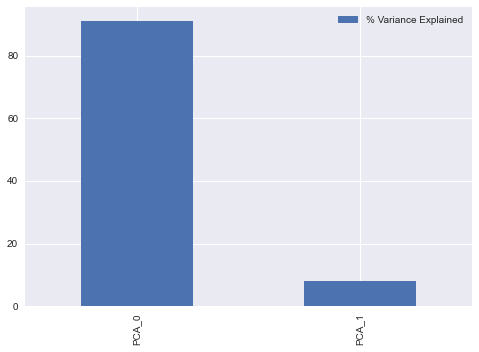

In [48]:

pd.DataFrame({'% Variance Explained':100*pca.explained_variance_ratio_},index=['PCA_'+str(i) for i in range(len(pca.explained_variance_ratio_))]).plot.bar()
plt.show();

**Task 3: Divide the white_wine dataset into a training set, a validation set, and a test set.**

- **a. Take out the first 1000 rows from white_wine and save it as the validation set**
- **b. Take out the last 1000 rows from white_wine and save it as the test set.**
- **c. Save the rest of rows from white_wine as the training set.**


In [13]:
validation_set = white_wine.head(1000)
test_set = white_wine.tail(1000)
training_set = white_wine[1000:3898]

In [14]:
from sklearn.model_selection import train_test_split

targets = white_wine['quality']
inputs = white_wine.drop('quality', axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets,test_size= 0.2,random_state = 421, shuffle = True)

In [33]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train,y_train, test_size = 0.25, random_state = 421, shuffle = True)

**Task 4: Investigate how the size of the training dataset affects the model performance on the test
set.**

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_trn)
scaled_trnX = scaler.transform(X_trn)
scaled_valX = scaler.transform(X_val)
train_sizes = [1, 100, 300, 500, 900, 1400,2000, 2350]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
lm1  = LinearRegression()
lm1.fit(scaled_trnX,y_trn )

print('The intercept =', lm1.intercept_);
print('The trained coefficients are:', lm1.coef_);
y_val_pred1 = lm1.predict(scaled_valX);
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_val, y_val_pred1)));

The intercept = 5.896528250510561
The trained coefficients are: [ 0.02649207 -0.17565783  0.01889334  0.36217418 -0.01809244  0.0730989
 -0.01299696 -0.38310559  0.1045522   0.06681117  0.25302319]
RMSE = 0.7734699436661941


In [18]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(), X = X_trn, y = y_trn,  train_sizes = train_sizes,  cv= 12,scoring = 'neg_mean_squared_error')

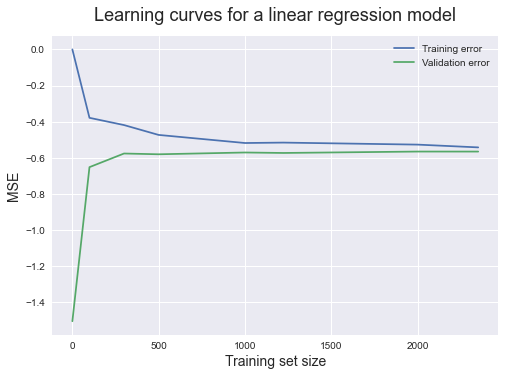

In [49]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores.mean(axis = 1), label = 'Training error')
plt.plot(train_sizes, validation_scores.mean(axis = 1), label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()


**Task 5: Critical Discussion: write your conclusions using critical thinking (no more than 150 words)
in your Jupyter notebook submission.**

- **a. Summarize your findings for each task.**

I obtained the data by incorpating a csv file of white_wine dataset, which is located on the notebook root directory, then I explored the dataset by using the shape property, I discoverd that the dataset has **12 features, and 4898 data points**. Secondly I used the shuffle function from the scikit learn library, this helps reorganize the data to do the random permutaion and combination. I visualized two features from the dataset on a scatter plot to find any correlation between the variables.

In task 2, I used an unsupervised learning approach to reduce the number of dimension in the dataset by doing a PCA Analysis. The number of pca components are kept at 2, it can also be noticed that around 98% percent of the variance was captured by the first and the second component. The scatter plot depicts the clusters of data point as per their quality. it can be observed that the points are randomly distributed between PCA_0 and PCA_1. The following bar plot shows the amount of variance caputured by each component

In task 3, the data is divided among three different sets, secondly the data is further splitted by using train_test_split function.

In task 4, it can be observed from the learning curve that as the number of training size increases the gap between validation and training set is converging, furthermore when the train size was under 300 the mean square error was -1.4 for the training set, but as the training and validation size gradually increased the model performance also improved

- **b. For Task 4, discuss whether there is any problem with that experimental design. If there
is, what is it? How may you further improve it so that the experimental results are more
reliable?**

I applied linear regression on the dataset, and mean square error metrics to check the model accuracy. The error was 0.7734699436661941, I think if we try other classification models to check if there is any improvement in the model overall performance, apart from that, in task 2 PCA was performed on the dataset, and perhaps including PCA components in the dataset that is supplied to linear regression model could fix the problem within the experimental design
